In [1]:
# import modules
# %pylab inline
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import torch 
from torch.autograd import Variable

%matplotlib inline 

## Dataset

In [2]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

# Path
data_dir = 'MNIST_data/'

# check for existence
os.path.exists(data_dir)

True

In [3]:
# load dataset
col = ['label'] + [f'pixel{x}' for x in range(784)]

train = pd.read_csv(os.path.join(data_dir, 'mnist_train.csv'), names=col, header=None)
train = shuffle(train)
test = pd.read_csv(os.path.join(data_dir, 'mnist_test.csv'), names=col, header=None)

In [4]:
# Train Dataset

train_x = train.iloc[:,1:].values.astype('float32') 
train_y = train.label.values 


# Test Dataset

test_x = test.iloc[:,1:].values.astype('float32') 
test_y = test.iloc[:,0].values 


# Val Dataset

split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

# Visualization

In [5]:
n = 0
images = train_x.reshape(-1, 28, 28)
img = images[n]
print('label =', train_y[n])

label = 9


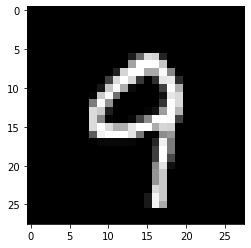

In [6]:
plt.imshow(img, cmap='gray')
plt.show()

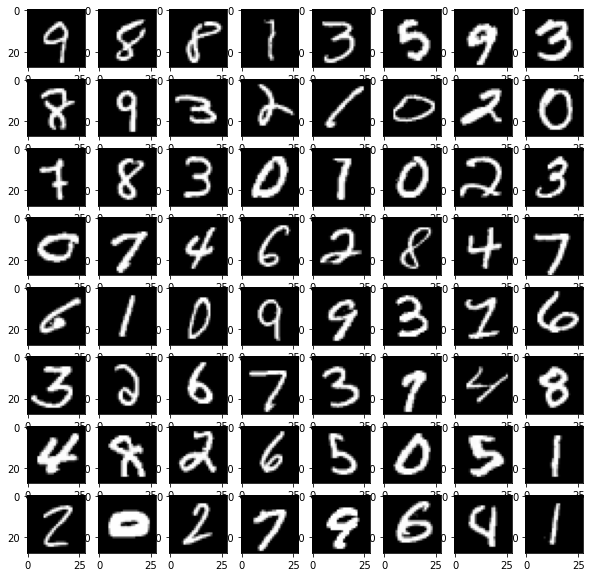

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(8,8, figsize=(10,10))

for i,ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')

# **Model Building**

In [8]:
# number of neurons in each layer
input = 784
hidden = 500
output = 10

# set remaining variables
epochs = 10
batch_size = 128
learning_rate = 0.001

#### Define Model

In [9]:
# Define Model :

model = torch.nn.Sequential(torch.nn.Linear(input, hidden),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hidden, output)) 

loss_fn = torch.nn.CrossEntropyLoss() 

# define optimization algorithm
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# preprocess a batch of dataset
def preprocess(unclean_batch_x):
    """Convert values to range 0-1"""
    temp_batch = unclean_batch_x / 255.0  # Normalize the pixel values
    return temp_batch 

# create a batch
def batch_creator(batch_size):  
    dataset_name = 'train'
    dataset_length = train_x.shape[0]

    batch_mask = rng.choice(dataset_length, batch_size)
    batch_x = eval(dataset_name + '_x')[batch_mask]
    batch_x = preprocess(batch_x)

    batch_y = eval(dataset_name + '_y')[batch_mask]
    
    return batch_x, batch_y

#### Train Network

In [10]:
total_batch = int(train.shape[0]/batch_size)

for epoch in range(epochs):
    avg_cost = 0
    for i in range(total_batch):
        # create batch
        batch_x, batch_y = batch_creator(batch_size)
        
       
        # pass that batch for training
        x, y = Variable(torch.from_numpy(batch_x)), Variable(torch.from_numpy(batch_y), requires_grad=False)
        pred = model(x)
      
        # get loss
        loss = loss_fn(pred, y)
       
        # perform backpropagation
        loss.backward()
        optimizer.step()

        avg_cost += loss.data/total_batch
    print('%5i   %f' %(epoch + 1, avg_cost))

    1   1.589443
    2   1.382735
    3   0.987285
    4   0.735706
    5   0.665657
    6   0.615979
    7   0.568816
    8   0.564723
    9   0.579674
   10   0.550400


## Get accuracy and precision



In [11]:
def get_accuracy(dataset_name):
    
    _x, _y = eval(dataset_name + '_x'), eval(dataset_name + '_y')
    x = Variable(torch.from_numpy(preprocess(_x)))
    y = Variable(torch.from_numpy(_y), requires_grad=False)

    pred = model(x)
    final_pred = np.argmax(pred.data.numpy(), axis=1) 
    acc_score = accuracy_score(_y, final_pred)

    print('\n%10s_accuracy : %f' %(dataset_name, acc_score))


for dataset in ['train', 'val']:
    get_accuracy(dataset)


     train_accuracy : 0.868929

       val_accuracy : 0.851167
